# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to : 

1. Apply Matthew D Zeiler, Rob Fergus approach to visualize CNNs
2. Apply  Mahendran and Vedaldi approach to visualize CNNs
3. Visualize the learned representations at each layer from the network 


In [0]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="800" height="300" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_blr_b6/cfus/week_11/module_3_week_11_experiment_4.mp4" type="video/mp4">
</video>
""")

## Dataset

### History

#### ImageNet
The ImageNet project is a large image database used for research purpose. It contains more than 14 million images belonging to the 20 thousand different categories. For example category like 'balloon' or 'apple' contains several hundered images. 

This database was presented for the first time as a poster at the 2009 Conference on Computer Vision and Pattern Recognition (CVPR) in Florida by researchers from the Computer Science department at Princeton University. 

A intersting 2012 breakthrough in solving the ImageNet Challenge is widely considered to be the beginning of the deep learning revolution of the 2010s:

#### VGG

VGG  is a pretrained model on imagenet which was developed by Visual Geometry Group, University of Oxford for the ILSVRC-2014. They released two different CNN models, specifically a 16-layer model and a 19-layer model.  VGG16 model consists of 16 convolutional layers and is very appealing because of its very uniform architecture. This currently the most preferred choice in the community for extracting features from images. The weight configuration of the VGGNet is publicly available and has been used in many other applications and challenges as a baseline feature extractor.


### Description

In this experiment we will visualize a VGG16 model trained on the Imagenet dataset.

The input to the network is a dog image which as 728 px height, 300 px width and 3 channels of color(RGB). The learned representations from the trained VGG16 model for this image are visualized using various approaches at each layer.

![alt text](https://cdn.talentsprint.com/aiml/Experiment_related_data/IMAGES/dog.jpg)

## AI/ML Technique

In this experiment we will peform CNNs visualization at each layer using these below two  approaches and VGG 16 trained model :

*    Matthew D Zeiler and Rob Fergus Approach 
*    Mahendran and Vedaldi Approach 

### Matthew D Zeiler and Rob Fergus Approach 
Recently, visualizing deep neural networks in particulary CNNs has resulted in many publications. 

The recent research or publications are base on the paper published by Matthew D Zeiler and Rob Fergus. In this they proposed a	multi-layered	deconvolutional	network	(deconvnet)	to	project	the	feature	activations	back to	the	input	pixel	space	for	a	trained	network. This reconstruction process makes use of extra information about locations of maxima in intermediate max-pooling layers.

To read more about this refer to the paper of [Matthew D Zeiler, Rob Fergus](https://arxiv.org/abs/1311.2901) 


### Mahendran and Vedaldi Approach 

In this approach we try to understand CNNs by inverting them using Gradient Descent. This kind of inversions allow us to know which information of the given input image is preserved in the features. 


To read more about this refer to the paper of   [Mahendran and Vedaldi](https://arxiv.org/abs/1412.0035)


&nbsp;&nbsp;

While working on the experiment you will able to understand these two approaches in a detailed way and differences between them.

&nbsp;&nbsp;

In this experiment we will performing following steps:
    
    1. Load the model and see its architecture
    2. Load and preprocess an image to pass as input to the network
    3. Visualize the kernel weights at each layer
    4. Visualize the image as it passes through the network
    5. Visualize output of each filter at a given layer
    6. Understand deep image representations by inverting Them [Mahendran, Vedaldi]


### Keywords

* CNN
* Minibatch
* Pooling
* Convolutions
* Filters
* Padding
* ReLU
* Softmax
* CrossEntorpyloss
* Adam
* Kernels/Filters
* Visualization of filters
* Visualization of learned representation

### Expected time to complete this experiment is : 90min

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [26]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M3W1E33_Visualization_CNNs" #name of the notebook

def setup():
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    ipython.magic("sx pip install Pillow==4.0.0")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week9/Exp4/dog.jpg")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week9/Exp4/cnn_utils.py")
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### 1. Load the model and see its architecture

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils

import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

model = models.vgg16(pretrained=True)
print(model.features)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:24<00:00, 22293530.89it/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(

#### We will load all the module details in a list 

In [0]:
modules = list(model.features.modules())
modules = modules[1:]
print(modules,"\n\n")
print("third module = ", modules[2])

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), ReLU(inplace), Conv2d(512, 512, kern

### 2. Load and preprocess an image to pass as input to the network

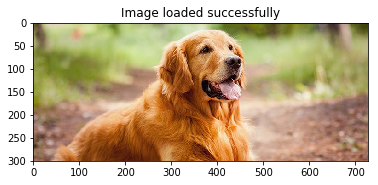

In [0]:
def normalize(image):
    normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
    preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
    ])
    image = Variable(preprocess(image).unsqueeze(0))
    return image

img_raw = Image.open("dog.jpg")
plt.imshow(img_raw)
plt.title("Image loaded successfully")

img = normalize(img_raw)

### 3. Visualize the kernel weights at each layer

(#filters, i/p depth, size of filter) ===  torch.Size([64, 64, 3, 3])
No. of filters:  64


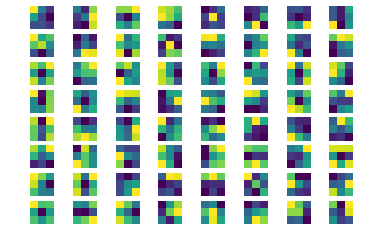

In [0]:
def visualize_weights(image, layer):
    weight_used = []
    
    ## Gather all Convolution layers and append their corresponding filters in a list
    for w in model.features.children():
        if isinstance(w, torch.nn.modules.conv.Conv2d):
            weight_used.append(w.weight.data)

    print("(#filters, i/p depth, size of filter) === ",weight_used[layer].shape)
    print("No. of filters: ", weight_used[layer].shape[0])
    filters = []
    for i in range(weight_used[layer].shape[0]):
        filters.append(weight_used[layer][i,:,:,:].sum(dim=0))    ##summing across input depth(3 in the first layer)
        filters[i].div(weight_used[layer].shape[1])
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)
    for i in range(int(np.sqrt(weight_used[layer].shape[0])) * int(np.sqrt(weight_used[layer].shape[0]))):
        a = fig.add_subplot(np.sqrt(weight_used[layer].shape[0]),np.sqrt(weight_used[layer].shape[0]),i+1)
        imgplot = plt.imshow(filters[i])
        plt.axis('off')

visualize_weights(img, 1)

The filters are usually small $(3X3)$ and hence the visualization of filter weights usually doesn't give us a clear understanding of the what the filters learn.
 
Therefore, we will visualize how the the input image looks as it is passed through the various layers in the network.

### 4. Visualizing the image as it passes through the network

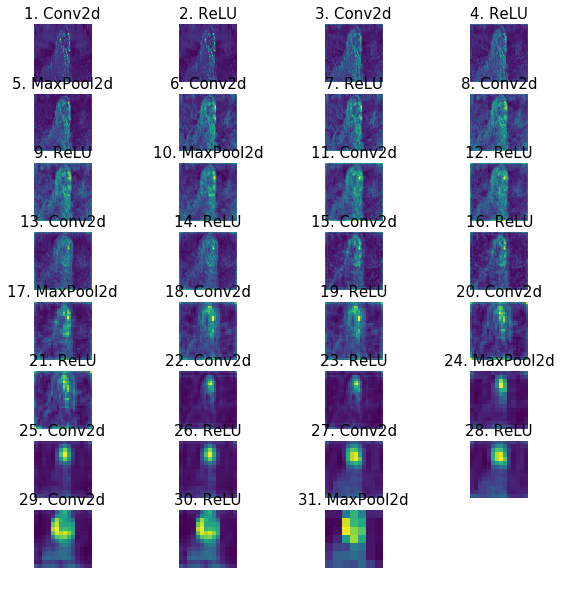

In [0]:
def to_grayscale(image):
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

def layer_outputs(image):
    outputs = []
    names = []
    
    ## feed forward the image through the network and store the outputs
    for layer in modules:
        image = layer(image) 
        outputs.append(image)
        names.append(str(layer))
    
    ## for visualization purposes, convert the output into a 2D image by averaging across the filters.
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)  ## convert say 64x112x112 to 112x112
        output_im.append(temp.data.numpy())
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (30, 40)


    for i in range(len(output_im)):
        a = fig.add_subplot(8,4,i+1)
        imgplot = plt.imshow(output_im[i])
        plt.axis('off')
        a.set_title(str(i+1)+". "+names[i].partition('(')[0], fontsize=15)

#     ##save the resulting visualization
#     plt.savefig('layer_outputs.jpg', bbox_inches='tight')

##
layer_outputs(img)

Through the above visualization, it is clearly visible how the CNN responds to an image at each layer and in the final layer, the pixels of the image which produce the highest activation values are visible as well. However, we still haven't looked at how the filters at each layer respond differently to features present in the input.

### 5. Visualizing output of each filter at a given layer 

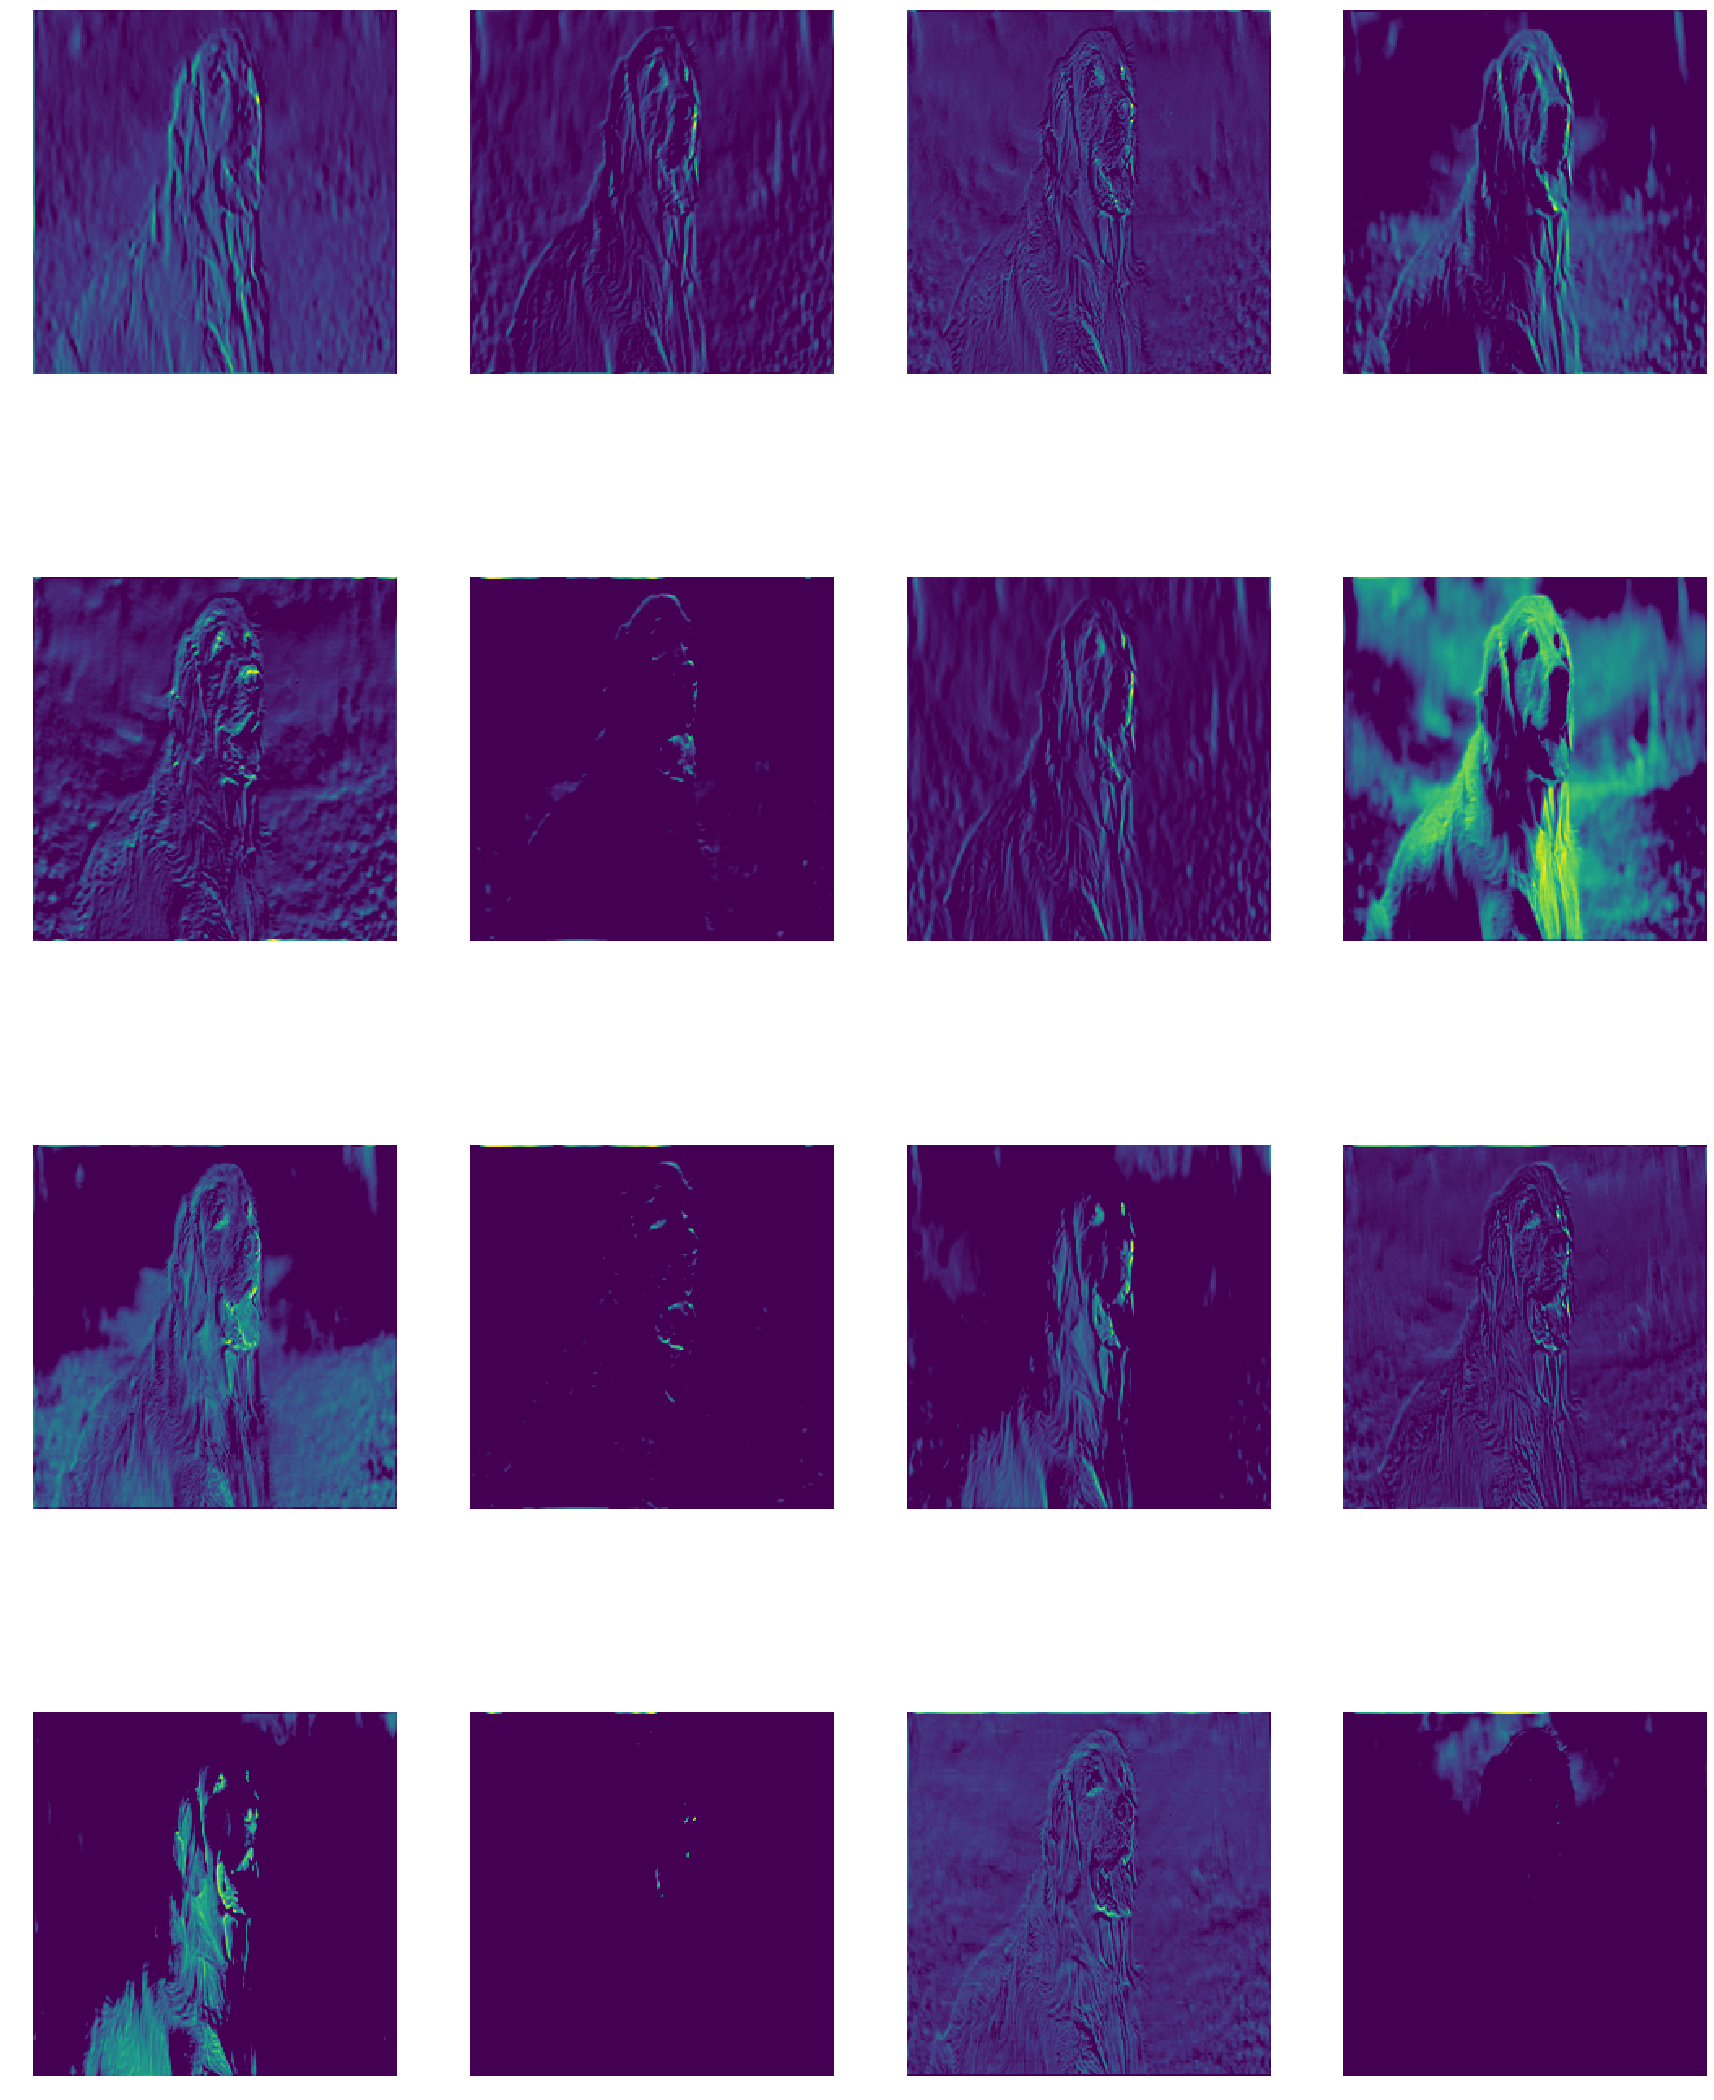

In [6]:
def filter_outputs(image, layer_to_visualize, num_filters=64):
    if layer_to_visualize < 0:
        layer_to_visualize += 31
    output = None
    name = None
    
    ## get outputs corresponding to the mentioned layer
    for count, layer in enumerate(modules):
        image = layer(image)
        if count == layer_to_visualize: 
            output = image
            name = str(layer)
    
    filters = []
    output = output.data.squeeze()

    ## if num_filters==-1, visualize all the filters
    num_filters = min(num_filters, output.shape[0])
    if num_filters==-1:
        num_filters = output.shape[0]

    for i in range(num_filters):
        filters.append(output[i,:,:])
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)

    for i in range(int(np.sqrt(len(filters))) * int(np.sqrt(len(filters)))):
        fig.add_subplot(np.sqrt(len(filters)), np.sqrt(len(filters)),i+1)
        imgplot = plt.imshow(filters[i])
        plt.axis('off')

## if num_filters==-1, visualize all the filters
filter_outputs(img,0,16)    #visualize the outputs of first 16 filters of the 1st layer

The above visualization shows that each filter responds differently to an input which implies that each filter learns and extracts different features from an input.

### 6. Understanding Deep Image Representations by Inverting Them [Mahendran, Vedaldi]

Like Zeiler and Fergus, their method starts from a specific input image. They record the network’s representation of that specific image and then reconstruct an image that produces a similar code. Thus, their method provides insight into what the activation of a whole layer represent, not what an individual neuron represents.

They show what each neuron “wants to see”, and thus what each neuron has learned to look for.

To visualize the function of a specific unit in a neural network, we $synthesize$ inputs that cause that unit to have high activation. To synthesize such a “preferred input example”, we start with a random image, meaning we randomly choose a color for each pixel. The image will initially look like colored TV static.

In [0]:
random_noise_img = Variable(1e-1 * torch.randn(1, 3, 224, 224), requires_grad=True)

Now we take an image $X$ whose representation $X_0$ at some layer $"target\_layer"$ we want to learn. Our aim is to reconstruct the noise image to get this representation $X_0$. The principle behind this is that the noise image will be so reconstructed such that it will represent what the particular layer for which it is trained against wants to see.

In [0]:
def get_output_at_nth_layer(inp, layer):
    for i in range(layer):
        inp = modules[i](inp)
    return inp[0]

## dont forget that the system is 0 indexed
target_layer = 18    ## which is this layer Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
inp_img = normalize(Image.open("./dog.jpg"))
inp_img_representation = get_output_at_nth_layer(inp_img, target_layer)

Some functions of code (euclidean_loss, alpha_norm, total_variation_norm, recreate_image) are present in utils.py. If you truly want to understand how this is implemented, it is recommended that you readthe second and third page of this [paper](https://arxiv.org/abs/1412.0035), specifically, the regularization part, before asking questions on that. The aim of this code is to mainly understand the deep representations.

In [9]:
from torch.optim import SGD
import cnn_utils

#define optimizers for learning the representation of the noise input image
optimizer = SGD([random_noise_img], lr=1e4, momentum=0.9)
alpha_reg_alpha = 6
alpha_reg_lambda = 1e-7
tv_reg_beta = 2
tv_reg_lambda = 1e-8
## Put model into evaluation state
model.eval #puts the model into evaluation state, weights get frozen

<bound method Module.eval of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

In [11]:
imgs=[]
for i in range(161):
        optimizer.zero_grad()
        
        ## get output at the target layer (not the final layer)
        output = get_output_at_nth_layer(random_noise_img,target_layer)
        
        # Calculate euclidian loss between output image and the target image
        euc_loss = 1e-1 * cnn_utils.euclidian_loss(inp_img_representation.detach(), output) #detach - so that input image weights don't get changed.
        
        # regularization
        reg_alpha = alpha_reg_lambda * cnn_utils.alpha_norm(random_noise_img, alpha_reg_alpha)
        reg_total_variation = tv_reg_lambda * cnn_utils.total_variation_norm(random_noise_img,tv_reg_beta)
        
        loss = euc_loss + reg_alpha + reg_total_variation
        loss.backward()
        optimizer.step() # update the weights
        
        # Generate image every 5 iterations
        if i % 10 == 0:
            print('Iteration:', str(i), 'Loss:', loss.item())
            x = cnn_utils.recreate_image(random_noise_img)
            imgs.append(x)

Iteration: 0 Loss: 0.0892525315284729
Iteration: 10 Loss: 0.050315357744693756
Iteration: 20 Loss: 0.022786946967244148
Iteration: 30 Loss: 0.013097844086587429
Iteration: 40 Loss: 0.008764401078224182
Iteration: 50 Loss: 0.0064307209104299545
Iteration: 60 Loss: 0.004988235887140036
Iteration: 70 Loss: 0.004238049499690533
Iteration: 80 Loss: 0.003593908157199621
Iteration: 90 Loss: 0.0034952955320477486
Iteration: 100 Loss: 0.0032813684083521366
Iteration: 110 Loss: 0.003007063874974847
Iteration: 120 Loss: 0.0029884984251111746
Iteration: 130 Loss: 0.0027455328963696957
Iteration: 140 Loss: 0.0026451791636645794
Iteration: 150 Loss: 0.002541415160521865
Iteration: 160 Loss: 0.002347589237615466


### Visualize the learned representations for the layer "target_layer"

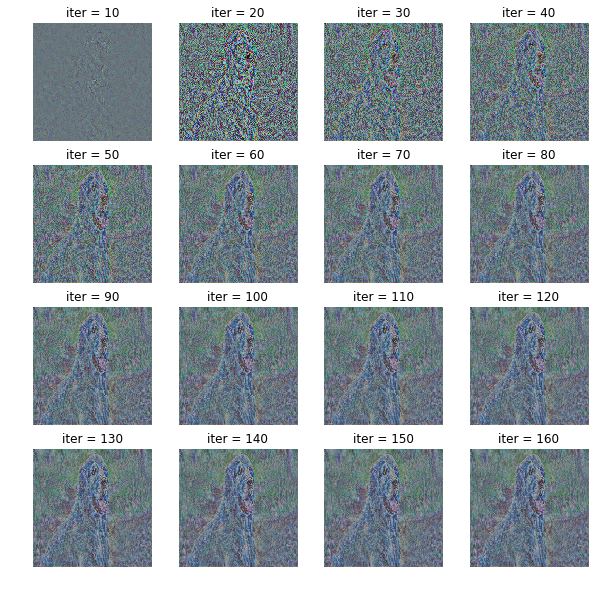

In [12]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(int(np.sqrt(len(imgs))) * int(np.sqrt(len(imgs)))):
    a = fig.add_subplot(np.sqrt(len(imgs)), np.sqrt(len(imgs)),i+1)
    imgplot = plt.imshow(imgs[i])
    a.set_title("iter = "+ str((i+1)*10))
    plt.axis('off')

#### Ungraded Exercise: Above we visualized the inverted representations for the 18th layer, find similar representations for different layers in the network and thus visualize what the network learns at each of those layer. Try for different target images as well

Iteration: 0 Loss: 0.11196597665548325
Iteration: 10 Loss: 0.060442004352808
Iteration: 20 Loss: 0.031056880950927734
Iteration: 30 Loss: 0.018301552161574364
Iteration: 40 Loss: 0.014832869172096252
Iteration: 50 Loss: 0.013718917034566402
Iteration: 60 Loss: 0.013091365806758404
Iteration: 70 Loss: 0.0123987328261137
Iteration: 80 Loss: 0.012470167130231857
Iteration: 90 Loss: 0.01195920817553997
Iteration: 100 Loss: 0.011933747678995132
Iteration: 110 Loss: 0.011895895004272461
Iteration: 120 Loss: 0.0115078529343009
Iteration: 130 Loss: 0.011491326615214348
Iteration: 140 Loss: 0.011401360854506493
Iteration: 150 Loss: 0.011275751516222954
Iteration: 160 Loss: 0.011358840391039848


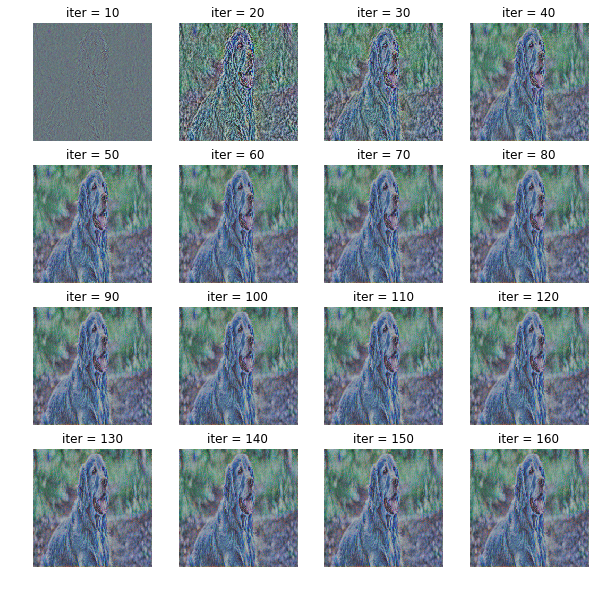

In [21]:
random_noise_img = Variable(1e-1 * torch.randn(1, 3, 224, 224), requires_grad=True)
target_layer = 11    ## which is this layer Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
inp_img = normalize(Image.open("./dog.jpg"))
inp_img_representation = get_output_at_nth_layer(inp_img, target_layer)

from torch.optim import SGD
import cnn_utils

#define optimizers for learning the representation of the noise input image
optimizer = SGD([random_noise_img], lr=1e4, momentum=0.9)
alpha_reg_alpha = 6
alpha_reg_lambda = 1e-7
tv_reg_beta = 2
tv_reg_lambda = 1e-8
## Put model into evaluation state
model.eval 

imgs=[]
for i in range(161):
        optimizer.zero_grad()
        
        ## get output at the target layer (not the final layer)
        output = get_output_at_nth_layer(random_noise_img,target_layer)
        
        # Calculate euclidian loss between output image and the target image
        euc_loss = 1e-1 * cnn_utils.euclidian_loss(inp_img_representation.detach(), output) #detach - so that input image weights don't get changed.
        
        # regularization
        reg_alpha = alpha_reg_lambda * cnn_utils.alpha_norm(random_noise_img, alpha_reg_alpha)
        reg_total_variation = tv_reg_lambda * cnn_utils.total_variation_norm(random_noise_img,tv_reg_beta)
        
        loss = euc_loss + reg_alpha + reg_total_variation
        loss.backward()
        optimizer.step() # update the weights
        
        # Generate image every 5 iterations
        if i % 10 == 0:
            print('Iteration:', str(i), 'Loss:', loss.item())
            x = cnn_utils.recreate_image(random_noise_img)
            imgs.append(x)
            
            
fig = plt.figure()
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(int(np.sqrt(len(imgs))) * int(np.sqrt(len(imgs)))):
    a = fig.add_subplot(np.sqrt(len(imgs)), np.sqrt(len(imgs)),i+1)
    imgplot = plt.imshow(imgs[i])
    a.set_title("iter = "+ str((i+1)*10))
    plt.axis('off')

Iteration: 0 Loss: 0.08310218155384064
Iteration: 10 Loss: nan


/content/cnn_utils.py:14: RuntimeWarning: invalid value encountered in greater
  recreated_im[recreated_im > 1] = 1
/content/cnn_utils.py:15: RuntimeWarning: invalid value encountered in less
  recreated_im[recreated_im < 0] = 0


Iteration: 20 Loss: nan
Iteration: 30 Loss: nan
Iteration: 40 Loss: nan
Iteration: 50 Loss: nan
Iteration: 60 Loss: nan
Iteration: 70 Loss: nan
Iteration: 80 Loss: nan
Iteration: 90 Loss: nan
Iteration: 100 Loss: nan
Iteration: 110 Loss: nan
Iteration: 120 Loss: nan
Iteration: 130 Loss: nan
Iteration: 140 Loss: nan
Iteration: 150 Loss: nan
Iteration: 160 Loss: nan


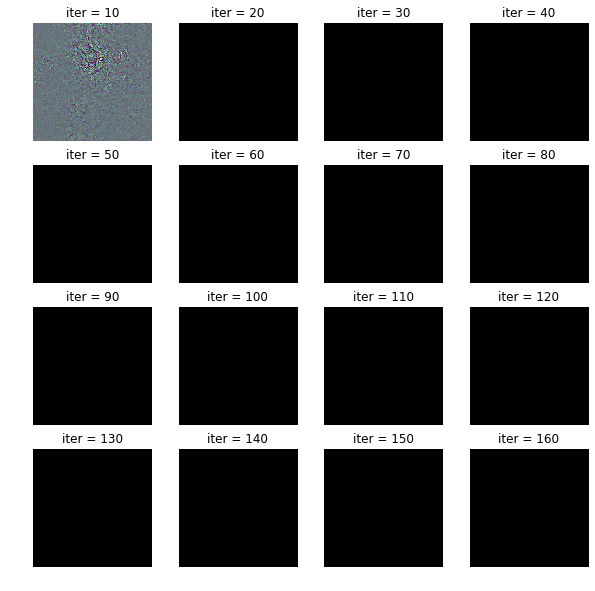

In [22]:
random_noise_img = Variable(1e-1 * torch.randn(1, 3, 224, 224), requires_grad=True)
target_layer = 29    ## which is this layer Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
inp_img = normalize(Image.open("./dog.jpg"))
inp_img_representation = get_output_at_nth_layer(inp_img, target_layer)

from torch.optim import SGD
import cnn_utils

#define optimizers for learning the representation of the noise input image
optimizer = SGD([random_noise_img], lr=1e4, momentum=0.9)
alpha_reg_alpha = 6
alpha_reg_lambda = 1e-7
tv_reg_beta = 2
tv_reg_lambda = 1e-8
## Put model into evaluation state
model.eval 

imgs=[]
for i in range(161):
        optimizer.zero_grad()
        
        ## get output at the target layer (not the final layer)
        output = get_output_at_nth_layer(random_noise_img,target_layer)
        
        # Calculate euclidian loss between output image and the target image
        euc_loss = 1e-1 * cnn_utils.euclidian_loss(inp_img_representation.detach(), output) #detach - so that input image weights don't get changed.
        
        # regularization
        reg_alpha = alpha_reg_lambda * cnn_utils.alpha_norm(random_noise_img, alpha_reg_alpha)
        reg_total_variation = tv_reg_lambda * cnn_utils.total_variation_norm(random_noise_img,tv_reg_beta)
        
        loss = euc_loss + reg_alpha + reg_total_variation
        loss.backward()
        optimizer.step() # update the weights
        
        # Generate image every 5 iterations
        if i % 10 == 0:
            print('Iteration:', str(i), 'Loss:', loss.item())
            x = cnn_utils.recreate_image(random_noise_img)
            imgs.append(x)
            
            
fig = plt.figure()
plt.rcParams["figure.figsize"] = (10, 10)
for i in range(int(np.sqrt(len(imgs))) * int(np.sqrt(len(imgs)))):
    a = fig.add_subplot(np.sqrt(len(imgs)), np.sqrt(len(imgs)),i+1)
    imgplot = plt.imshow(imgs[i])
    a.set_title("iter = "+ str((i+1)*10))
    plt.axis('off')

### Please answer the questions below to complete the experiment:




In [0]:
#@title Mahendran, Vedaldi technique, we loop through the dataset to optimize weights of the network in discussion? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["True","False"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [27]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5235
Date of submission:  22 May 2019
Time of submission:  22:15:06
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
